In [1]:
import math
import random
import pandas as pd
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
import matplotlib.pyplot as plt

# Question 1

In [2]:
import math
import random
import pandas as pd
import random
import numpy as np
def k_mean(data,k):
    iters=0
    q=1
    r_mean=data.sample(k)
    while q>0:
        ind=r_mean.index.tolist()
        indx=data.index.tolist()
        col=data.columns.tolist()
        dist=pd.DataFrame()
        for i in range (k):
            distance=(data[col] - np.array(r_mean.loc[ind[i]])).pow(2).sum(1).pow(0.5)
            v=i+1
            v=str(v)          
            dist['d'+v]=distance
        col_dist=dist.columns.tolist()
        #--------------------------------------------------------------------------------------------------
        var=pd.DataFrame(dist.idxmin(axis=1),columns=['class'])
        u_mean=[]
        col.append('class')
        new_data=pd.DataFrame(columns=col)
        for i in range(k):
            index1=(var[var['class']==col_dist[i]]).index.tolist()
            cluster=data.loc[data.index.isin(index1)]
            m=cluster.mean().tolist()
            u_mean.append(m)
            l=len(cluster)
            list1=[]
            for j in range (l):
                list1.append(i+1)
            cluster['class']=list1
            new_data=new_data.append(cluster)
        col.remove(col[-1])
        u_mean=pd.DataFrame(u_mean,columns=col,index=ind)
        if u_mean.equals(r_mean):
            q=0
        else:
            r_mean=u_mean    
                
        res=new_data.reindex(indx)
        iters=iters+1
        label=res['class'].tolist()
        temp1=set(label)
        temp1=list(temp1)
        var3=0
        for i in range (k):
            for j in range (len(label)):
                var2=label[j]
                if var2==temp1[i]:
                    label[j]=var3
            var3=var3+1
    return new_data,u_mean,res,iters,label
k=3
data=pd.read_csv('C:/Users/MANVENDRA/Desktop/study material/pattern assignments/Assignment 2/data11.csv')
[x,y,z,a,b]=k_mean(data,k)





FileNotFoundError: [Errno 2] File C:/Users/MANVENDRA/Desktop/study material/pattern assignments/Assignment 2/data11.csv does not exist: 'C:/Users/MANVENDRA/Desktop/study material/pattern assignments/Assignment 2/data11.csv'

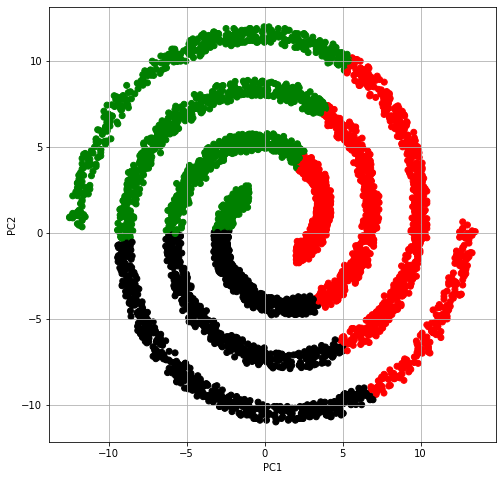

In [3]:
colors=np.array(['r','g','black','orange','blue','yellow','green','maroon'])

plt.figure(figsize=(8,8))
plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(z.c1,z.c2,color=colors[b])

# Question 2 (part a)

In [6]:
original_image=cv2.imread('test.jpg',1)

img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized)


[[215. 195. 145.]
 [218. 198. 148.]
 [222. 202. 152.]
 ...
 [222. 213. 180.]
 [225. 216. 183.]
 [227. 218. 187.]]


In [7]:
data=pd.DataFrame(vectorized,columns=['R','G','B'])
print(data)
k=2

            R      G      B
0       215.0  195.0  145.0
1       218.0  198.0  148.0
2       222.0  202.0  152.0
3       227.0  207.0  157.0
4       230.0  210.0  160.0
...       ...    ...    ...
177571  221.0  211.0  176.0
177572  221.0  213.0  177.0
177573  222.0  213.0  180.0
177574  225.0  216.0  183.0
177575  227.0  218.0  187.0

[177576 rows x 3 columns]


In [8]:
[x,y,z,a,b]=k_mean(data,k)
print(y)

C:\Users\MANVENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                 R           G           B
163339  112.503510  121.287262   73.968468
72216   215.384048  197.224045  136.809174


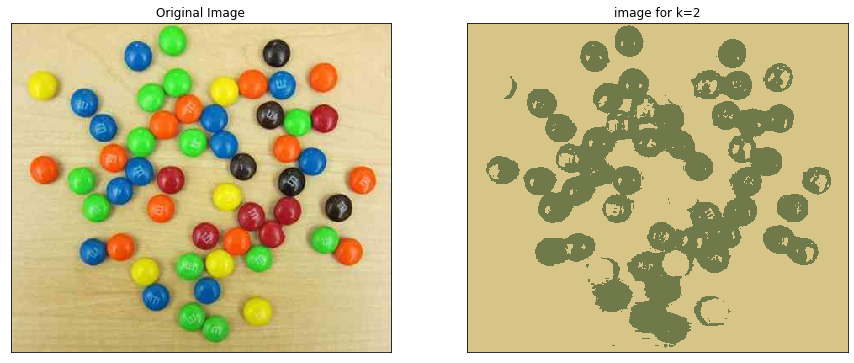

In [9]:
m=y.index.tolist()
n=x.index.tolist()
o=z.index.tolist()


list_=[]
for i in range (len(m)):
    h1=(y.loc[m[i]]).tolist()
    h2=x[x['class']==i+1]
    l1=len(h2)
    for j in range (l1):
        list_.append(h1)
        
    
res1=pd.DataFrame(list_,columns=['R','G','B'],index=n)
res1=res1.reindex(o)
list_1=[]
for g in range (len(res1)):
    h3=(res1.loc[g]).tolist()
    list_1.append(h3)
listx=np.array(list_1)    
listx=np.uint8(listx)
result_image = listx.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
h5=str(k)
plt.title('image for k='+h5), plt.xticks([]), plt.yticks([])
plt.show()

# Question 2 (part b)

In [ ]:
data=pd.DataFrame(vectorized,columns=['Red','Green','Blue'])
print(data)
k=30

In [ ]:
r,c,x=original_image.shape
print(r,c,x)
row=[]
col=[]
for i in range(1,r+1):
    for j in range(1,c+1):
        col.append(j)
        row.append(i)
print('--------------------------------New Data Frame is--------------------------------')
data['Rows']=row
data['Columns']=col
print(data)
print('---------------------------------------------------------------------------------')


In [ ]:
[x,y,z,a,b]=k_mean(data,k)
print(y)

In [ ]:
r=np.array(y['Rows'])
r=255*(r/392.0)
print(r)
c=np.array(y['Columns'])
c=255*(c/453.0)
print(c)

In [ ]:
m=y.index.tolist()

n=x.index.tolist()
o=z.index.tolist()


list_=[]
for i in range (len(m)):
    
    h1=(y.loc[m[i]]).tolist()
    h1[0]=(h1[0]+h1[3]+h1[4])/3
    h1[1]=(h1[1]+h1[3]+h1[4])/3
    h1[2]=(h1[2]+h1[3]+h1[4])/3
    h1.remove(h1[-1])
    h1.remove(h1[-1])
    h2=x[x['class']==i+1]
    l1=len(h2)
    for j in range (l1):
        list_.append(h1)
        
    
res1=pd.DataFrame(list_,columns=['R','G','B'],index=n)
res1=res1.reindex(o)
list_1=[]
for g in range (len(res1)):
    h3=(res1.loc[g]).tolist()
    list_1.append(h3)
listx=np.array(list_1)    
listx=np.uint8(listx)
result_image = listx.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
h5=str(k)
plt.title('image for k='+h5), plt.xticks([]), plt.yticks([])
plt.show()